In [136]:
datasets = {
    "SDII": {
        "YLABEL": "SDII",
        "TYPE": "mm",
        "FILE_PATH": "SDII.csv",
        "TITLE": "Simple Precipitation Intensity Index",
        "MEDIUM_AVREAGE": "blue",
    },
    "TXN": {
        "YLABEL": "TXN",
        "TYPE": "°C",
        "FILE_PATH": "Txn.csv",
        "TITLE": "Daily Maximum Temperature(min)",
        "MEDIUM_AVREAGE": "orange",

    },
    "CSDI": {
        "YLABEL": "CSDI",
        "TYPE": " days",
        "FILE_PATH": "CSDI.csv",
        "TITLE": "Cold Spell Duration Index",
        "MEDIUM_AVREAGE": "blue",
    },
    "TNn": {
        "YLABEL": "TNn",
        "TYPE": "°C",
        "FILE_PATH": "TNn.csv",
        "TITLE": "TNn Daily Minimum Temperature (min)",
        "MEDIUM_AVREAGE": "orange",
    },
    "ID": {
        "YLABEL": "ID",
        "TYPE": " days",
        "FILE_PATH": "id.csv",
        "TITLE": "Icing Days",
        "MEDIUM_AVREAGE": "blue",
    },
    "Txx": {
        "YLABEL": "Txx",
        "TYPE": "°C",
        "FILE_PATH": "TXx.csv",
        "TITLE": "Daily Maximum Temperature",
        "MEDIUM_AVREAGE": "both",
    },
    "DTR": {
        "YLABEL": "DTR",
        "TYPE": "°C",
        "FILE_PATH": "DTR.csv",
        "TITLE": "Daily Temperature Range",
        "MEDIUM_AVREAGE": "both",
    },
    "TNx": {
        "YLABEL": "TNx",
        "TYPE": "°C",
        "FILE_PATH": "TNx.csv",
        "TITLE": "TNx Daily Minimum Temperature (min)",
        "MEDIUM_AVREAGE": "both",
    }
}



In [137]:
XLABEL = "Years"
START_YEAR = 1950
END_YEAR = 2010

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


# Mount Google Drive to access files (if your CSV file is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Y Label: SDII
File Path: SDII.csv
Title: Simple Precipitation Intensity Index
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = -0.06x + 128.59
R-squared: 0.39852086166399825
19.7905 18.662999999999997
19.43
12.26
13.828688524590165


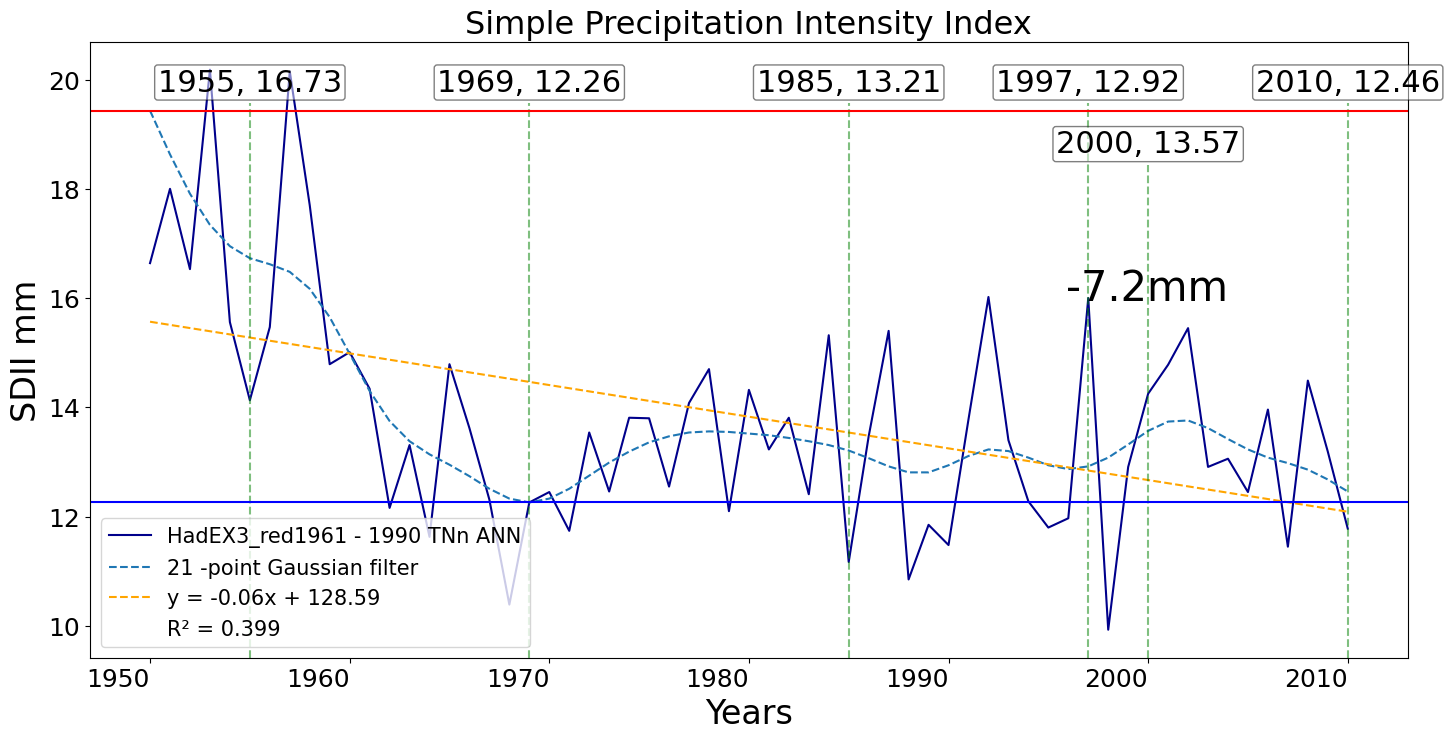

Y Label: TXN
File Path: Txn.csv
Title: Daily Maximum Temperature(min)
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = 0.02x + -28.00
R-squared: 0.5308432156814787
8.94318 8.46028
7.53
6.15
6.968360655737705


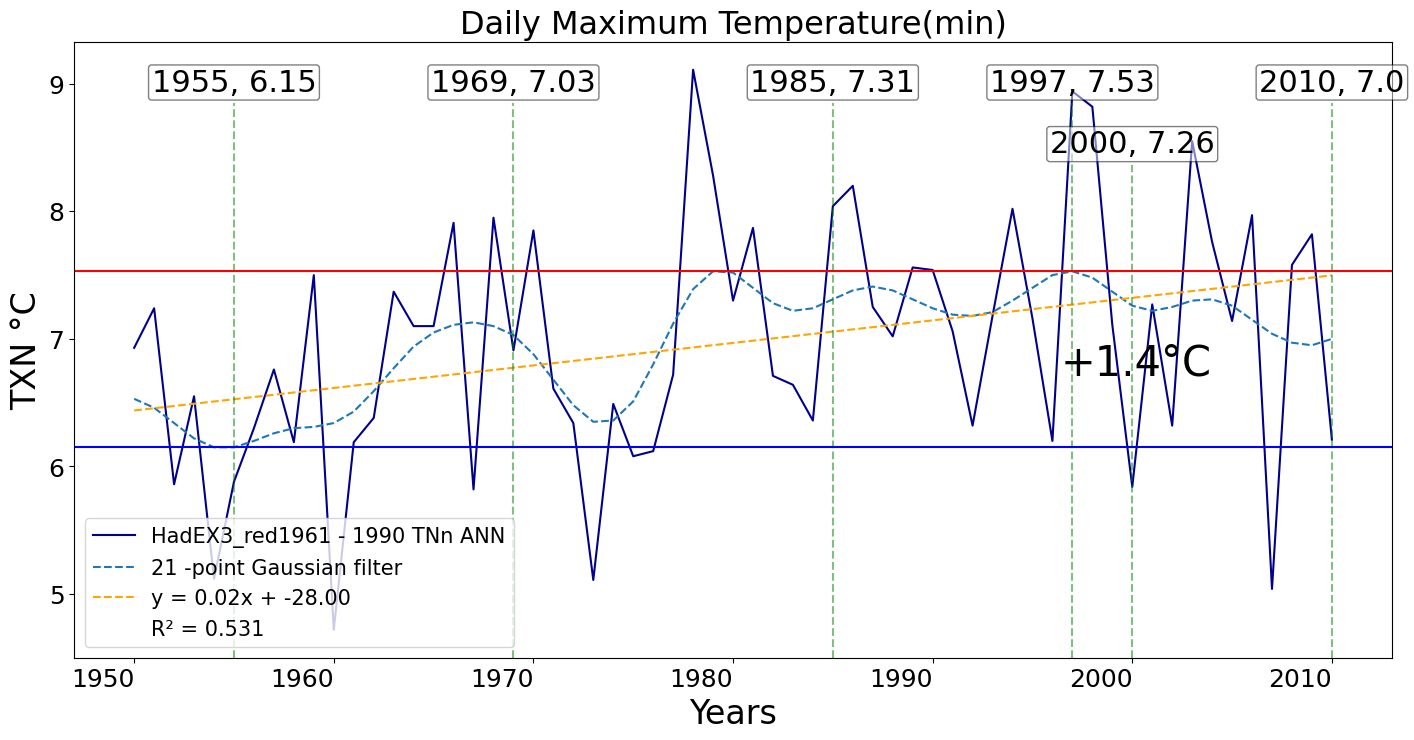

Y Label: CSDI
File Path: CSDI.csv
Title: Cold Spell Duration Index
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = -0.08x + 162.98
R-squared: 0.45066207320971385
15.598637334743522 13.771008566895821
8.09
0.45
2.053442622950819


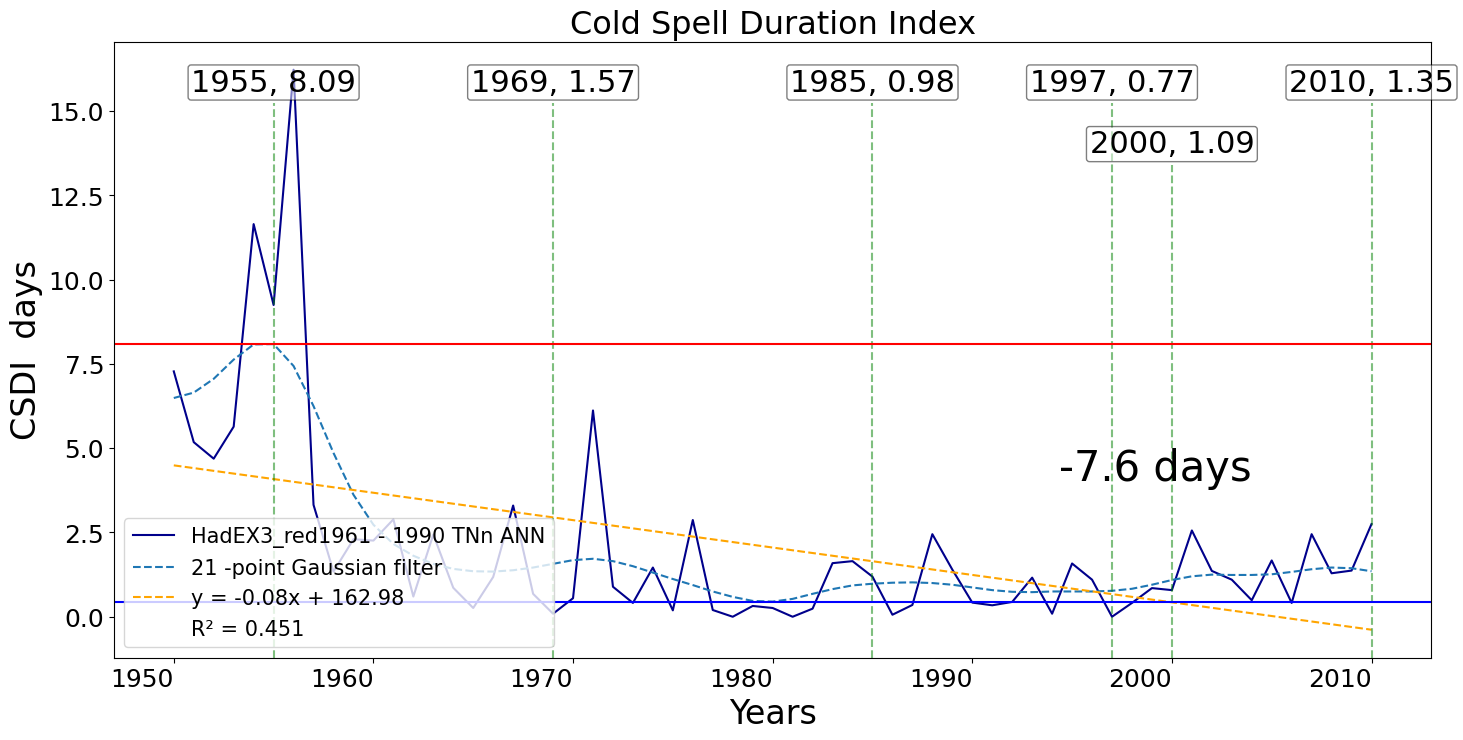

Y Label: TNn
File Path: TNn.csv
Title: TNn Daily Minimum Temperature (min)
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 51
Error occurred during model fitting: Found input variables with inconsistent numbers of samples: [61, 51]
Regression Equation: y = 0.02x + -43.09
R-squared: 0.4999808148054349
-1.6752200000000004 -2.3561200000000007
-3.04
-4.51
-3.6956862745098045


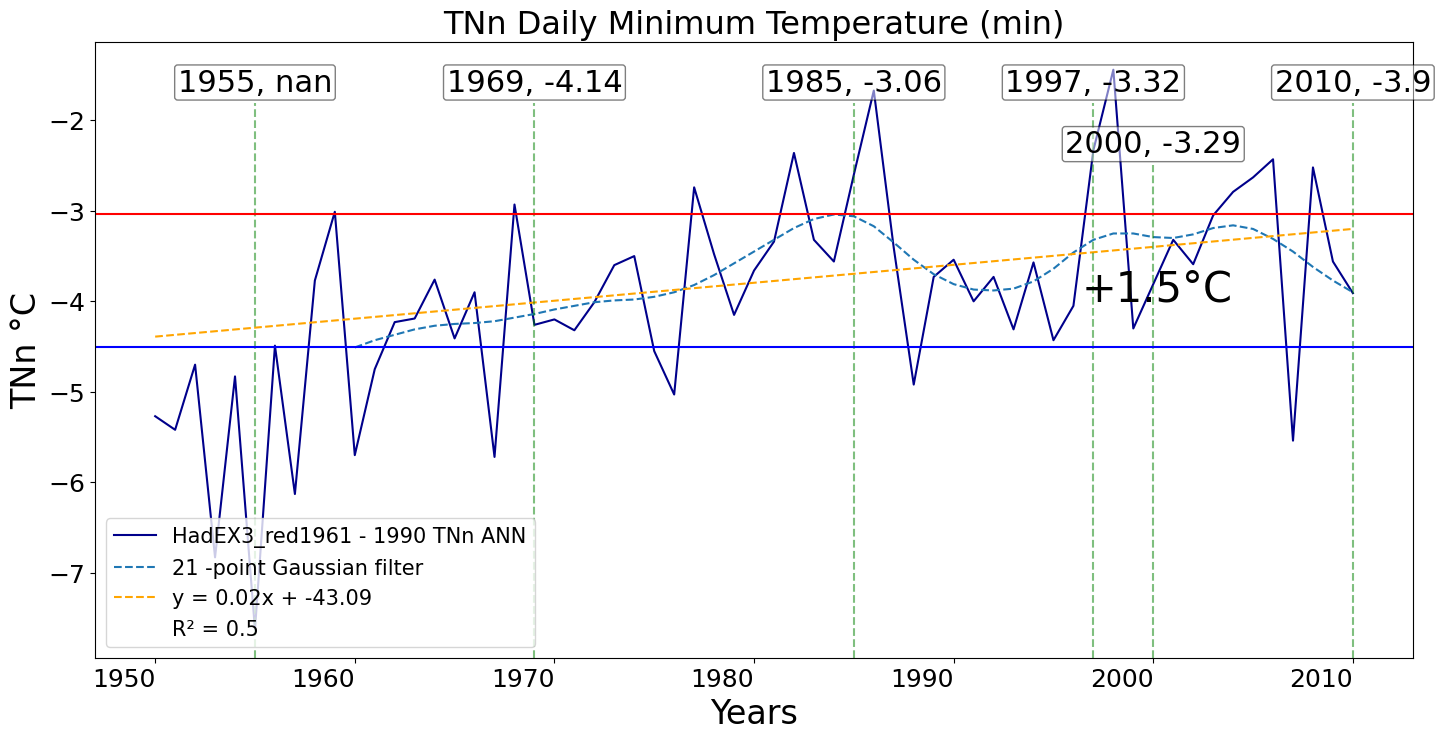

Y Label: ID
File Path: id.csv
Title: Icing Days
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 50
Error occurred during model fitting: Found input variables with inconsistent numbers of samples: [61, 50]
Error occurred during model fitting with years 1960 to 2010: Found input variables with inconsistent numbers of samples: [51, 50]
Regression Equation: y = -0.00x + 1.25
R-squared: 0.11514064934434898
0.2886 0.2556
0.11
0.02
0.0658


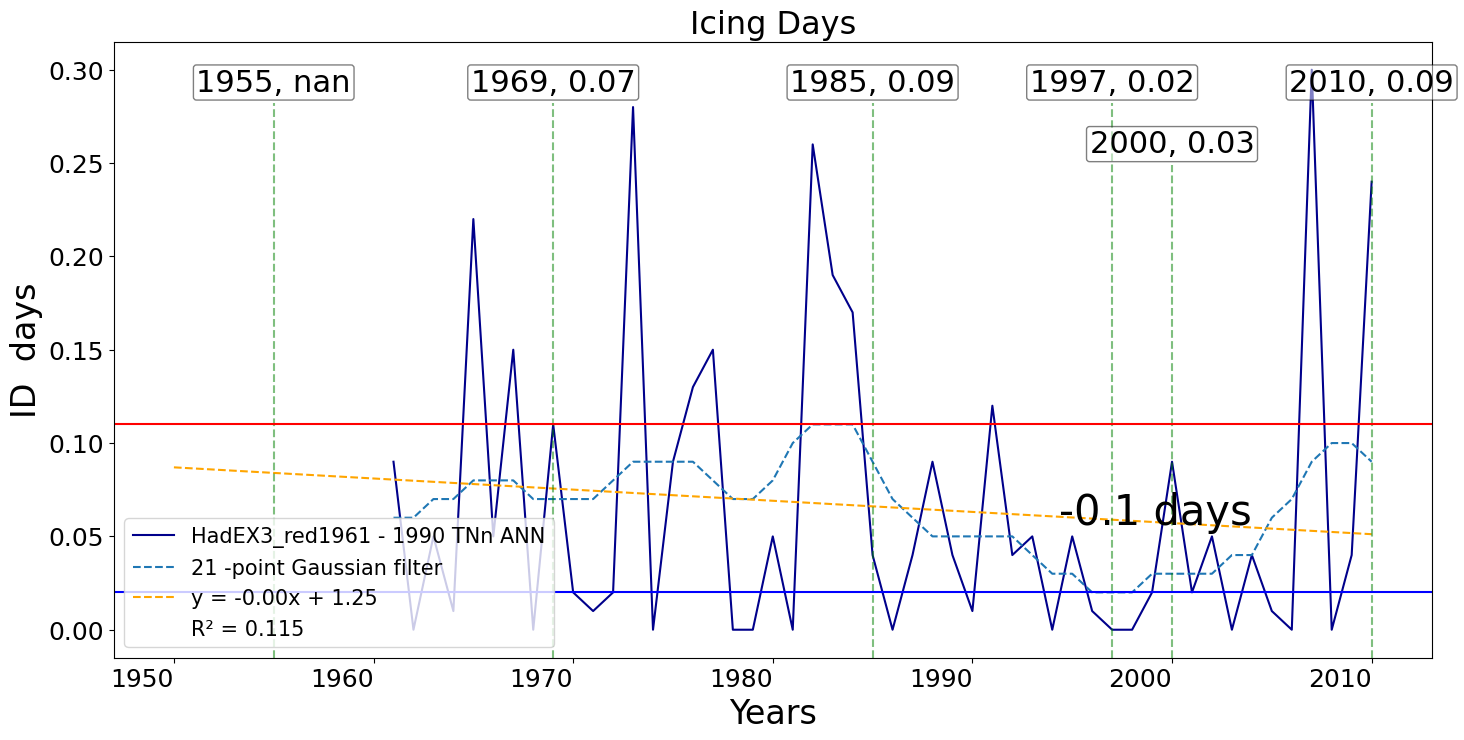

Y Label: Txx
File Path: TXx.csv
Title: Daily Maximum Temperature
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = -0.05x + 144.78
R-squared: 0.4001327440793476
42.560019999999994 41.54691999999999
39.98
34.91
36.15770491803278


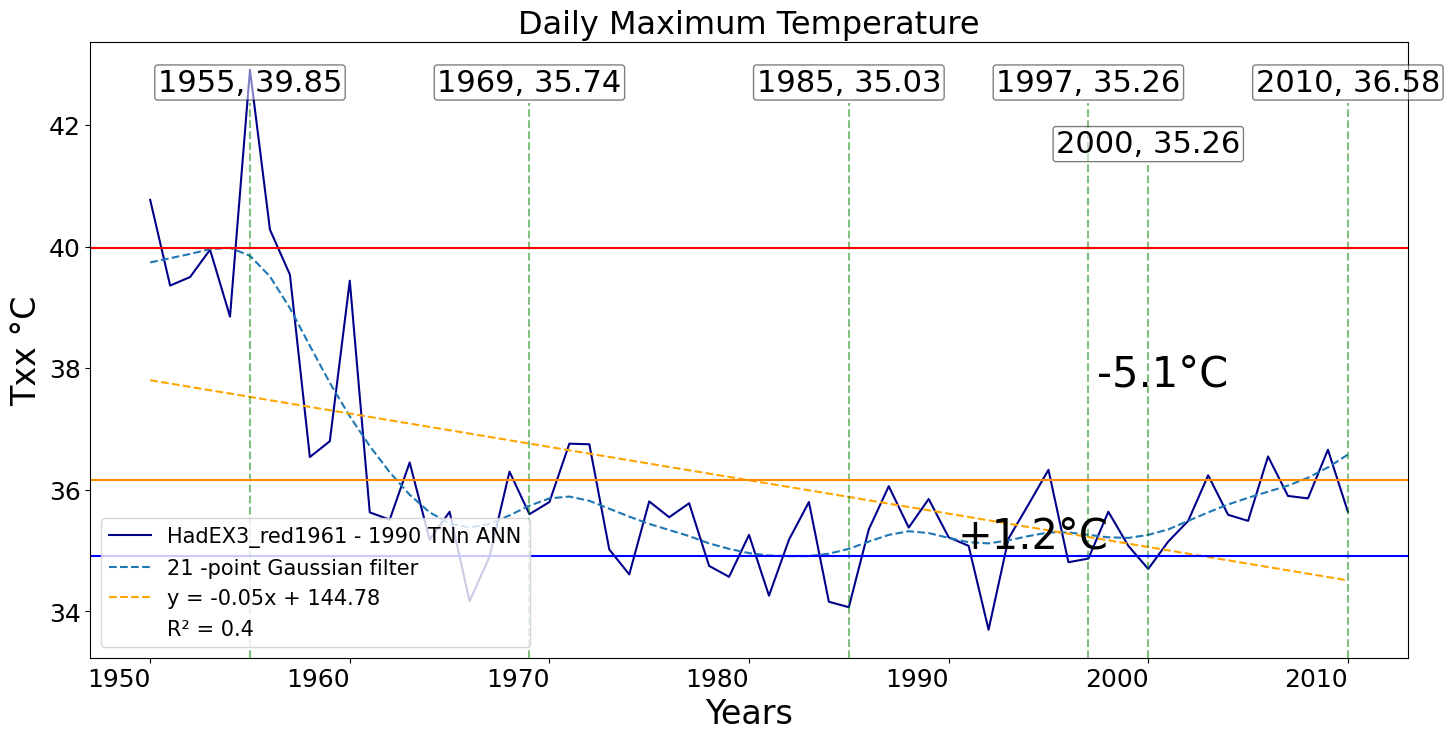

Y Label: DTR
File Path: DTR.csv
Title: Daily Temperature Range
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = -0.02x + 52.43
R-squared: 0.5632469449360722
14.41284 14.10264
14.02
12.24
12.849836065573772


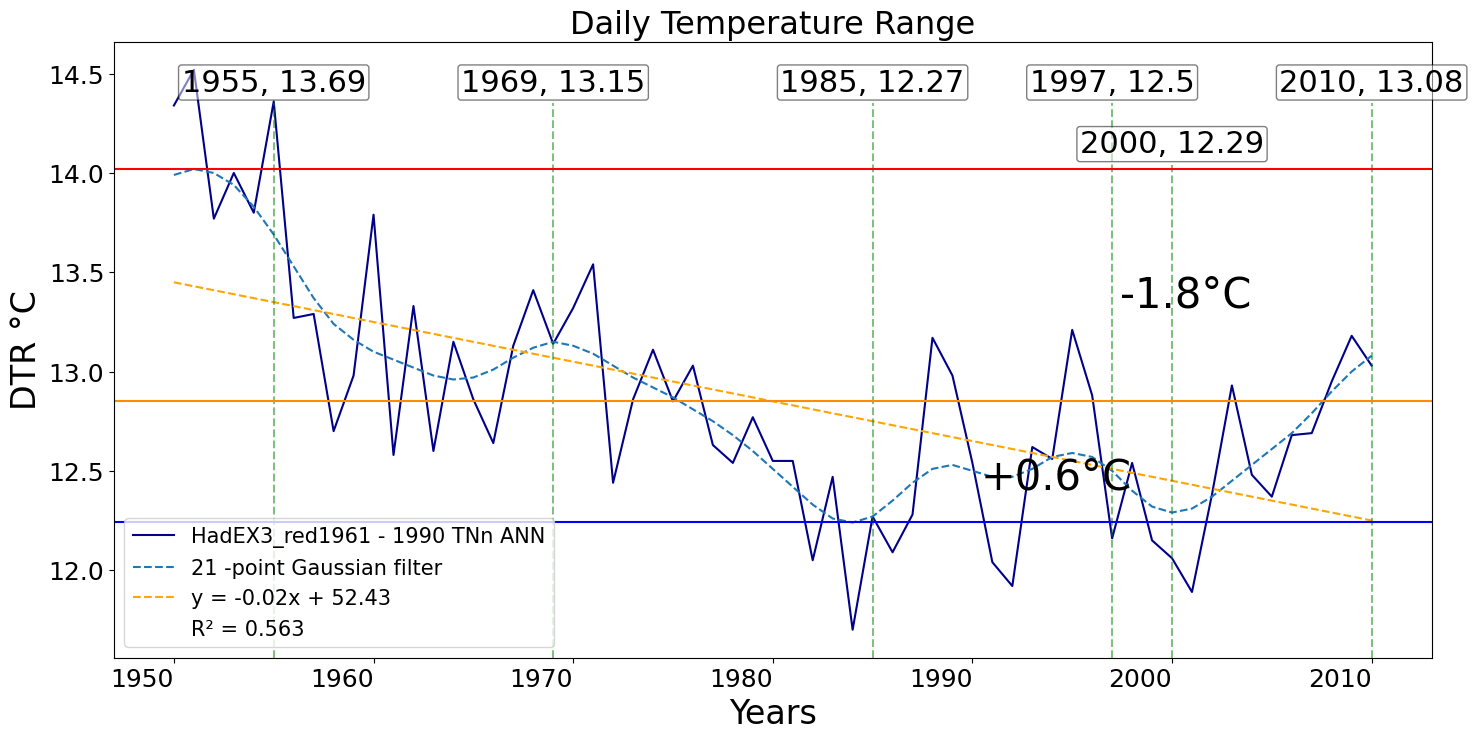

Y Label: TNx
File Path: TNx.csv
Title: TNx Daily Minimum Temperature (min)
from 1950 to 2010
[1950, 1960, 1970, 1980, 1990, 2000, 2010]
61 61
Regression Equation: y = -0.05x + 111.00
R-squared: 0.40818870832698895
24.4491 23.8386
23.88
19.89
20.817049180327867


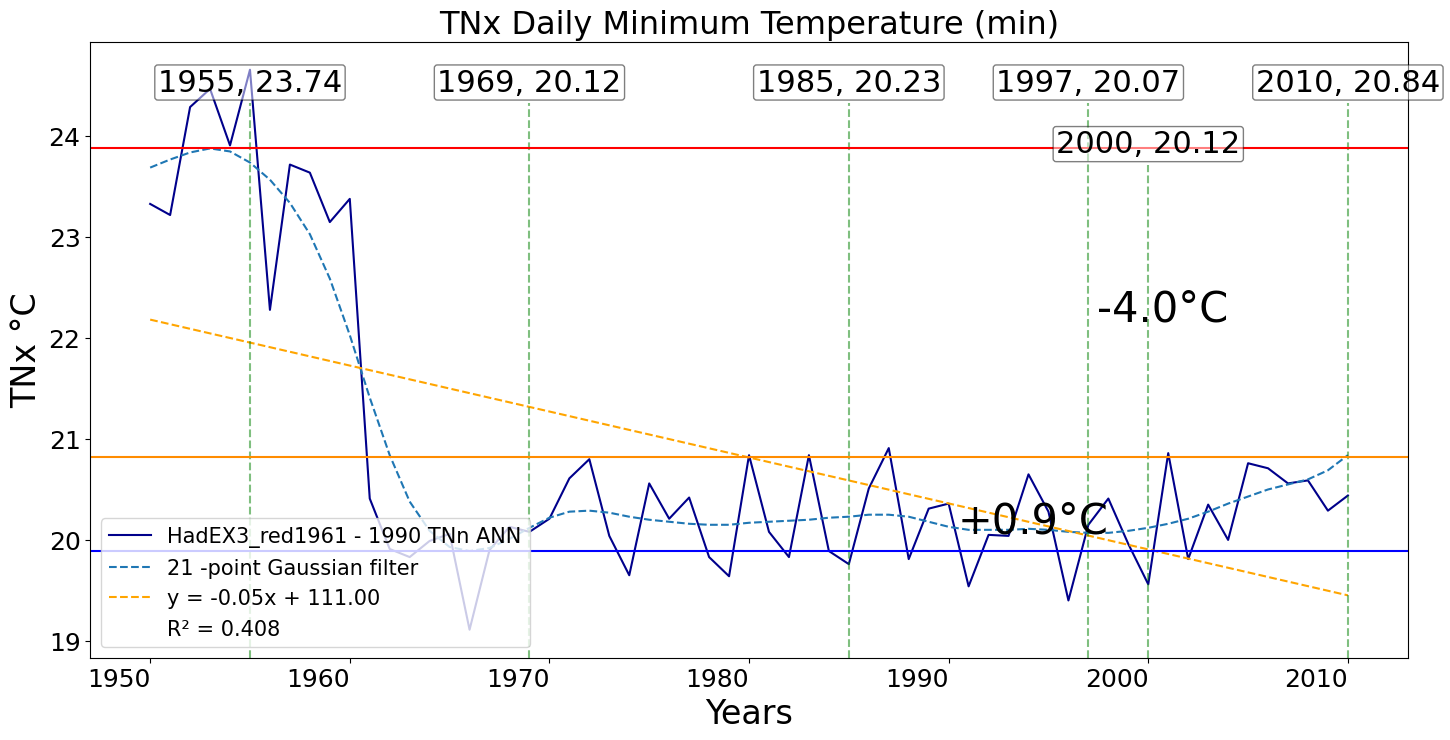

In [148]:
for dataset, properties in datasets.items():

    YLABEL = properties['YLABEL']
    FILE_PATH = properties['FILE_PATH']
    TITLE = properties['TITLE']
    TYPE = properties['TYPE']
    MEDIUM_AVREAGE = properties['MEDIUM_AVREAGE']

    print(f"Y Label: {YLABEL}")
    print(f"File Path: {FILE_PATH}")
    print(f"Title: {TITLE}")

    # Load the CSV file into a pandas DataFrame
    file_path = "/content/drive/MyDrive/GMB/" + FILE_PATH  # Replace with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Assuming you have a column named 'X' and another column named 'Y'
    x_values = df['a']
    y_values_a = df['c']
    y_values_b = df['b']

    # Extract the desired subset for the years X1 to X2
    subset_mask = (df['a'] >= START_YEAR) & (df['a'] <= END_YEAR)

    x_values = df['a'][subset_mask]
    y_values_a = df['c'][subset_mask]
    y_values_b = df['b'][subset_mask]

    print("from ", end="")
    print(list(x_values)[0], end="")
    print(" to ", end="")
    print(list(x_values).pop())

    def numbers_ending_with_zero(input_list):
        """
        Filter numbers from the input list that end with zero.

        Parameters:
        - input_list (list): List of numbers.

        Returns:
        - list: List containing numbers ending with zero.
        """
        return [num for num in input_list if num % 10 == 0]

    # Example usage:
    x_values_on_graph = numbers_ending_with_zero(list(x_values))


    print(x_values_on_graph)

    vertical_lines = [1955, 1969, 1985, 1997, 2000, 2010]

    def get_y_value_for_year(year, x_values, y_values):

        # Ensure that x_values are sorted
        sorted_points = sorted(zip(x_values, y_values))
        sorted_x_values, sorted_y_values = zip(*sorted_points)

        # Find the index of the year in the sorted_x_values
        try:
            index = sorted_x_values.index(year)
            y_value = sorted_y_values[index]
            return y_value
        except ValueError:
            print(f"No data for the year {year}.")
            return None

    # Sample data (replace these with your actual data)
    years = np.arange(1950, 2011).reshape(-1, 1)  # Years from 1950 to 2010

    precipitation = np.array(y_values_a)  # Replace with your precipitation values

    # Find indices of NaN values
    nan_indices = np.isnan(precipitation)

    # Remove NaN values from predictions array
    predictions_without_nan = precipitation[~nan_indices]

    precipitation = predictions_without_nan


    print(len(years), len(precipitation))

    # Create linear regression model
    model = LinearRegression()

    # precipitation
    # Fit the model for the years 1955 to 2010
    try:
        # Fit the model for the years 1955 to 2010
        model.fit(years, precipitation)
    except Exception as e:
        print("Error occurred during model fitting:", e)
        try:
            # Try fitting the model for the years 1960 to 2010
            years = np.arange(1960, 2011).reshape(-1, 1)
            model.fit(years, precipitation)
        except Exception as e:
            print("Error occurred during model fitting with years 1960 to 2010:", e)
            try:
                # Try fitting the model for the years 1961 to 2010
                years = np.arange(1961, 2011).reshape(-1, 1)
                model.fit(years, precipitation)
            except Exception as e:
                print("Error occurred during model fitting with years 1961 to 2010:", e)

    # Print the equation of the regression line
    slope = model.coef_[0]
    intercept = model.intercept_

    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    print("Regression Equation:", equation)


    # Calculate R-squared value
    r_squared = model.score(years, precipitation)

    # Print R-squared value
    print("R-squared:", r_squared)


    # Create a figure with a specific size
    plt.figure(figsize=(17, 8))  # Adjust width and height as needed


    # Plot the data for 'Column_B'
    plt.plot(x_values, y_values_b, label='HadEX3_red1961 - 1990 TNn ANN', color='#00008B', linestyle='-')

    # Plot the data
    plt.plot(x_values, y_values_a, label='21 -point Gaussian filter', linestyle='--')


    years = np.arange(1950, 2011).reshape(-1, 1)  # Years from 1955 to 2010

    regression_line = model.predict(years)
    regression_line
    slope = model.coef_[0]
    intercept = model.intercept_



    # Ensure the regression line corresponds to the subset of x_values starting from 1950
    plt.plot(x_values, regression_line, label=equation, color='orange', linestyle='--')

    plt.plot([], [], label=f"R\u00B2 = {round(r_squared, 3)}", color='white')



    # Add labels and a title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL + ' ' + TYPE)
    plt.title(TITLE)

    plt.xticks(x_values_on_graph, rotation=0, ha='right', fontsize=18)  # Adjust rotation and spacing as needed
    plt.yticks(fontsize=18)


    # Add a legend
    plt.legend()



    fontSize = 22

    def axis(boxes_hieght, exception_hieght):
      plt.axvline(x=1955, color='green', linestyle='--', alpha=0.5, ymax=0.9)
      plt.text(1955, boxes_hieght, f'''{1955}, {get_y_value_for_year(1955, x_values, y_values_a)}''', fontsize=fontSize, color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))


      plt.axvline(x=1969, color='green', linestyle='--', alpha=0.5, ymax=0.9)
      plt.text(1969, boxes_hieght, f'''{1969}, {get_y_value_for_year(1969, x_values, y_values_a)}''', fontsize=fontSize, color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))


      plt.axvline(x=1985, color='green', linestyle='--', alpha=0.5, ymax=0.9)
      plt.text(1985, boxes_hieght, f'''{1985}, {get_y_value_for_year(1985, x_values, y_values_a)}''', fontsize=fontSize, color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))


      plt.axvline(x=1997, color='green', linestyle='--', alpha=0.5, ymax=0.9)
      plt.text(1997, boxes_hieght, f'''{1997}, {get_y_value_for_year(1997, x_values, y_values_a)}''',  color='black', fontsize=fontSize, ha='center' , bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))


      plt.axvline(x=2000, color='green', linestyle='--', alpha=0.5, ymax=0.8)
      plt.text(2000, exception_hieght, f'''{2000}, {get_y_value_for_year(2000, x_values, y_values_a)}''', fontsize=fontSize, color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))


      plt.axvline(x=2010, color='green', linestyle='--', alpha=0.5, ymax=0.9)
      plt.text(2010, boxes_hieght, f'''{2010}, {get_y_value_for_year(2010, x_values, y_values_a)}''', fontsize=fontSize, color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.1'))



    # Add labels and a title with increased font size
    plt.xlabel(XLABEL, fontsize=24)
    plt.ylabel(YLABEL + ' ' + TYPE, fontsize=24)
    plt.title(TITLE, fontsize=23)
    plt.legend(loc='lower left', prop={'size': 15})










    # Remove the file extension
    FILE_PATH = os.path.splitext(FILE_PATH)[0]
    plot_path = "/content/drive/MyDrive/GMB/GMB_IMG/" + FILE_PATH + ".png"


    # Get the current y-axis limits
    ymin, ymax = plt.gca().get_ylim()

    # Calculate the height of the y-axis
    axvline_height = ((ymax - ymin) * 0.92) + ymin

    axvline_height_exception = ((ymax - ymin) * 0.82) + ymin


    print(axvline_height, axvline_height_exception)
    axis(axvline_height, axvline_height_exception)


    # Plot a red horizontal line at the maximum value of the 21-point Gaussian filter
    plt.axhline(y=np.min(y_values_a), color='blue', label=f'Maximum of 21-point Gaussian Filter: {np.min(y_values_a)}')

    plt.axhline(y=np.max(y_values_a), color='red', label=f'Maximum of 21-point Gaussian Filter: {np.max(y_values_a)}')



    # Add text annotation for the minimum value
    if MEDIUM_AVREAGE == 'blue':
      plt.text(((np.max(x_values) - np.min(x_values)) * (1 - 0.1)) + np.min(x_values), ((np.max(y_values_a) - np.min(y_values_a)) * 0.6) + np.min(y_values_a),
              f'-{round(np.max(y_values_a) - np.min(y_values_a), 1)}{TYPE}', ha='right', va='top', fontsize=30)
    elif MEDIUM_AVREAGE == 'orange':
      plt.text(((np.max(x_values) - np.min(x_values)) * (1 - 0.1)) + np.min(x_values), ((np.max(y_values_a) - np.min(y_values_a)) * 0.6) + np.min(y_values_a),
              f'+{round(np.max(y_values_a) - np.min(y_values_a), 1)}{TYPE}', ha='right', va='top', fontsize=30)
    else: # both

        plt.axhline(y=np.mean(y_values_a), color='#ff8c00', label=f'{np.max(y_values_a)}')


        plt.text(((np.max(x_values) - np.min(x_values)) * (1 - 0.1)) + np.min(x_values), ((np.max(y_values_a) - np.mean(y_values_a)) * 0.55) + np.mean(y_values_a),
              f'-{round(np.max(y_values_a) - np.min(y_values_a), 1)}{TYPE}', ha='right', va='top', fontsize=30)

        plt.text(((np.max(x_values) - np.min(x_values)) * (1 - 0.2)) + np.min(x_values), ((np.mean(y_values_a) - np.min(y_values_a)) * 0.55) + np.min(y_values_a),
          f'+{round(np.mean(y_values_a) - np.min(y_values_a), 1)}{TYPE}', ha='right', va='top', fontsize=30)




    # Show the plot
    print(np.max(y_values_a))
    print(np.min(y_values_a))
    print(np.mean(y_values_a))
    plt.savefig(plot_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

<ipython-input-149-bdfd85d69e46>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = original_image.resize(output_size, Image.ANTIALIAS)


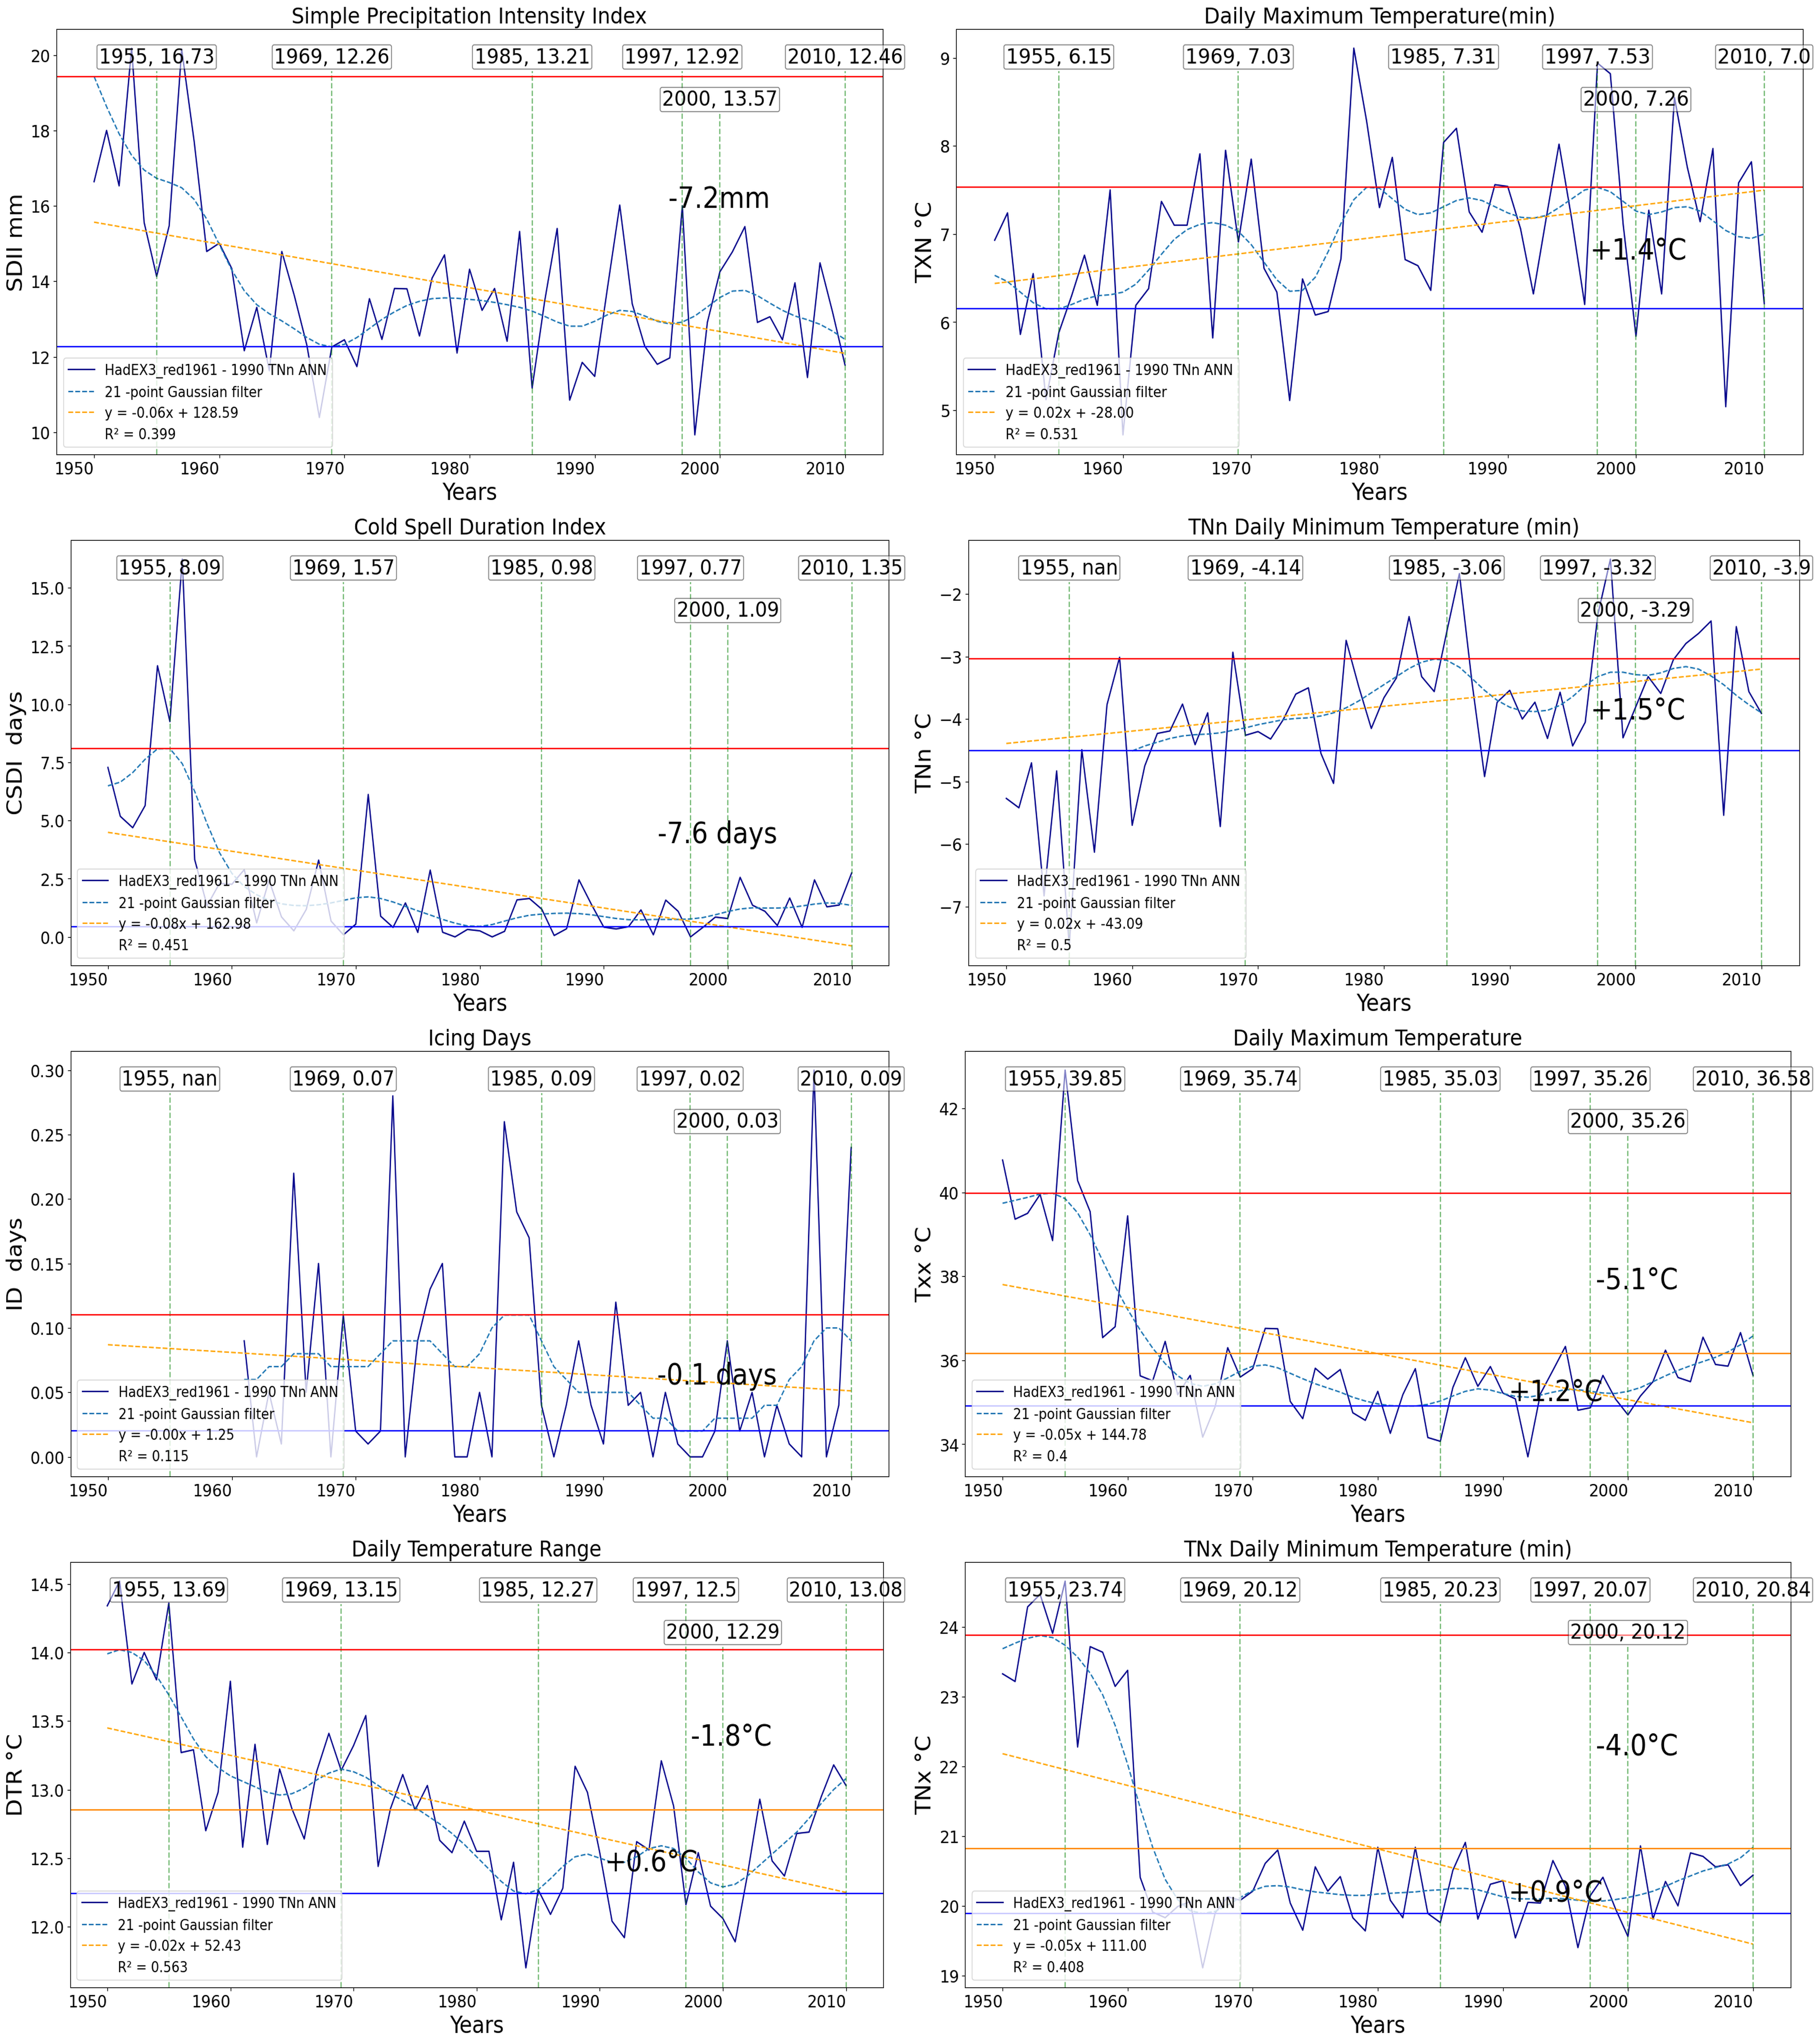

In [149]:
from PIL import Image

img_path = "/content/drive/MyDrive/GMB/GMB_IMG/"


def resize_images(images, output_size):
    resized_images = []

    for image_path in images:
        # Open the image file
        original_image = Image.open(image_path)

        # Resize the image
        resized_image = original_image.resize(output_size, Image.ANTIALIAS)

        # Append the resized image to the list
        resized_images.append(resized_image)

    return resized_images

image_paths = [
                f'{img_path}SDII.png',
                f'{img_path}Txn.png',
                f'{img_path}CSDI.png',
                f'{img_path}TNn.png',
                f'{img_path}id.png',
                f'{img_path}TXx.png',
                f'{img_path}DTR.png',
                f'{img_path}TNx.png'
               ]
output_size = (1920, 1080)  # Adjust the size as needed

resized_images = resize_images(image_paths, output_size)

# Save the resized images
for i, resized_image in enumerate(resized_images):
    resized_image.save(f'{img_path}/resized_images/resized_image_{i + 1}.png')


from PIL import Image

img_path = "/content/drive/MyDrive/GMB/GMB_IMG/resized_images/"

# Open your eight images
image1 = Image.open(f"{img_path}resized_image_1.png")
image2 = Image.open(f"{img_path}resized_image_2.png")
# Open the additional six images
image3 = Image.open(f"{img_path}resized_image_3.png")
image4 = Image.open(f"{img_path}resized_image_4.png")
image5 = Image.open(f"{img_path}resized_image_5.png")
image6 = Image.open(f"{img_path}resized_image_6.png")
image7 = Image.open(f"{img_path}resized_image_7.png")
image8 = Image.open(f"{img_path}resized_image_8.png")

# Create a new blank image with double the width and adjusted height
collage_width = image1.width * 2
collage_height = max(image1.height + image3.height + image5.height + image7.height,
                     image2.height + image4.height + image6.height + image8.height)

collage = Image.new("RGB", (collage_width, collage_height))

# Paste images onto the collage
collage.paste(image1, (0, 0))
collage.paste(image2, (image1.width, 0))

# Adjust the y-coordinate for the bottom row
y_offset_bottom = max(image1.height, image2.height)

collage.paste(image3, (0, y_offset_bottom))
collage.paste(image4, (image1.width, y_offset_bottom))
collage.paste(image5, (0, y_offset_bottom + image3.height))
collage.paste(image6, (image1.width, y_offset_bottom + image4.height))
collage.paste(image7, (0, y_offset_bottom + image3.height + image5.height))
collage.paste(image8, (image1.width, y_offset_bottom + image4.height + image6.height))

# Save the collage
collage.save(f"{img_path}output_collage.png")

collage